# K-Means Clustering

* approach to partitioning a data set into K distinct, non-overlapping clusters
* to perform, must first specify the desired number of clusters K
* then K-means algorithm will assign each observation to exactly one of the K clusters

information about the dataset:

Obs:   114

1. open                     imports as % GDP, '73-
2. inf                      avg. annual inflation, '73-
3. pcinc                    1980 per capita inc., U.S. 
4. land                     land area, square miles
5. oil                      =1 if major oil producer
6. good                     =1 if 'good' data
7. lpcinc                   log(pcinc)
8. lland                    log(land)
9. lopen                    log(open)
10. linf                    log(inf)
11. opendec                 open/100
12. linfdec                 log(inf/100)


In [1]:
import pandas as pd
df = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/openness.dta')
df.head()

,open,inf,pcinc,land,oil,good,lpcinc,lland,lopen,linf,opendec,linfdec
0,31.400000,9.9,1998.0,919595.0,0.0,0.0,7.599902,13.731690,3.446808,2.292535,0.314,-2.312635
1,9.400000,117.0,4342.0,1072067.0,0.0,1.0,8.376090,13.885100,2.240710,4.762174,0.094,0.157004
2,16.700001,9.5,8349.0,2966150.0,0.0,1.0,9.029897,14.902780,2.815409,2.251292,0.167,-2.353878
3,35.599998,5.0,8230.0,32375.0,0.0,1.0,9.015541,10.385140,3.572345,1.609438,0.356,-2.995732
4,91.000000,4.8,9185.0,240.0,1.0,0.0,9.125327,5.480639,4.510859,1.568616,0.910,-3.036554


## mathematical notations for k-clustering

* Let $C_1,/dots, C_k$ denote sets containing the indices of the observations in each cluster: these sets satisfy two properties

1. $C_1 \cup C_2 \cup \dots \cup C_k = \{1,\dots,n\}$. IOW, each observation belongs to at least one of the K clusters

2. $C_k \cap C_{k'} = \{~\}~\forall~k \neq k^{'}$. IOW the clusters are non-overlapping; no observation belongs to more than one cluster

* For instance, if $i$ is in the kth cluster, then $i \in C_k$

* idea behind K-means clustering is that a good clustering is one for which the within-cluster variation is as small as possible

* the within-cluster variation for cluster $C_k$ is a measure $W(C_k)$ of the amount by which the observations within a cluster differ from each other; hence we want to solve the problem

$$ \underset{C_{1}, \ldots, C_{K}}{\operatorname{minimize}}\left\{\sum_{k=1}^{K} W\left(C_{k}\right)\right\} $$

* in words, this formula says we want to partition the observations into K clusters s.t the total within-cluster variation, summed over all K clusters, is as small as possible

* solving this last equation seems like a reasonable idea, but to make it happen we need to define the within-cluster variation

* many possible ways to define this concept, but by far the most common choice involves squared Euclidean distance; define

$$ W(C_k) = \frac{1}{|C_k|} \sum_{i,i' \in C_k}^{} \sum_{j=1}^p (x_{ij} - x_{i',j})^2 $$

where $p = dim(d_{ij})$, and $|C_k|$ denotes number of observations in kth cluster; IOW, the within-cluster variation for the kth cluster is the sum of all of the pairwise squared Euclidean distances between the observations in the kth cluster divided by the total number of observations in the kth cluster. Therefore,

$$ \underset{C_{1} \ldots, C_{K}}{\operatorname{minimize}}\left\{\sum_{k=1}^{K} \frac{1}{\left|C_{k}\right|} \sum_{i, i^{\prime} \in C_{k}} \sum_{j=1}^{p}\left(x_{i j}-x_{i^{\prime} j}\right)^{2}\right\} $$


## algorithm: K-Means Clustering

(1) Randomly assign a number, from 1 to K, to each of the observations; these serve as initial cluster assignments for the observations

(2) Iterate until the cluster assignments stop changing:

A. For each of the K clusters, compute the cluster centroid; the kth cluster centroid is the vector of the p feature means for the observations in the kth cluster

B. Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance)

* algorithm is guarenteed to decrease the value of the objective function at each step

* since resulting classification will depend on the initial (random) clustering assignment in step (1), the algorithm is said to find a local rather than a global optimum

* therefore it's important to run the algorithm multiple times from different random configurations e.g. between 25 to 50 times is recommended

* one selects the best solution i.e where the objective function is the smallest

* K-means algorithm described here only works for continuously distributed data; it won't work for categorical features

* recommended to scale the features prior to applying the algorithm; different scales among different features will severely affect the classification algorithm


In [2]:
import patsy
X = patsy.dmatrix('-1 + lopen + linf', data=df, return_type='dataframe')

### Distance Measures: Euclidean Distance

* default distance measures in most ML algorithms and the one used in the explanation above

* if chosen, then observations with high values of the features will be clustered together

* observations with low values of the features will also be clustered together

* unfortunately, sklearn only provides the distance measure; see post about alternative packages with different distance measures: https://stackoverflow.com/questions/5529625/is-it-possible-to-specify-your-own-distance-function-using-scikit-learn-k-means

In [3]:
from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=42)
pred_y = kmeans.fit_predict(X)

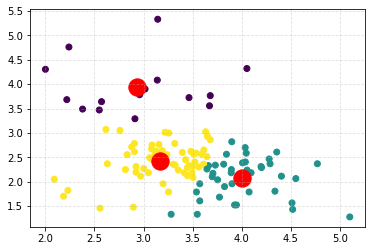

In [4]:
from matplotlib import pyplot as plt
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=kmeans.labels_.astype(float)) #Plotting the data colored by cluster
plt.grid(alpha=0.4,linestyle='--') #Adding a grid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

## Choosing K: The Elbow Method

* want a small within-cluster variance, but the within-cluster variance tends to decrease toward 0 as we increase K

* the within-cluster variance is exactly 0 when K is equal to the number of data points in the dataset; then each data point is its own cluster and there is no error between it and the center of its cluster

* our goal is to choose a small value of K that still has a low within-cluster variance and the elbow usually represents where we start to have diminishing returns by increasing K


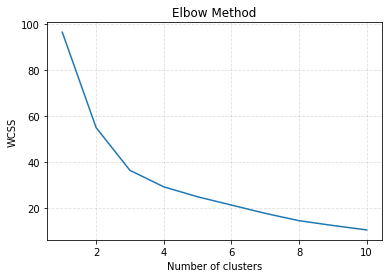

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.grid(alpha=0.4,linestyle='--') #Adding a grid
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()